#### Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Getting the dataset

In [2]:
dataset = pd.read_csv('practice.csv')

#### Cropping dataset for meaningful values

In [3]:
dataset = dataset.iloc[:,2:36].values

#### Visualizing the data

In [4]:
dataset = pd.DataFrame(dataset)
dataset

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,Sherghati,60-65,M,824211,16-18 Months,Prepaid,51-100,0GB-0.5GB,301-500,1-50,...,3,Payment Banking,No,No,Shows,Romance,English,2000,Yes,Vodafone
1,Puri,30-35,F,752015,16-18 Months,Postpaid,151-200,0.5GB-1GB,151-200,250-300,...,4,Wallet,Yes,Yes,Shows,Romance,Hindi,500,No,Idea
2,Chandrapur Ho,40-45,F,442401,6-8 Months,Postpaid,1-50,1GB-1.5GB,301-500,1-50,...,1,Wallet,No,No,Live TV,Action,English,10000,No,Idea
3,Chittapur,35-40,M,585211,0-2 Months,Prepaid,101-150,0GB-0.5GB,751-1000,151-200,...,4,Wallet,Yes,No,Live TV,Sci-fi,English,3000,Yes,Idea
4,Majauli,40-45,M,486666,10-12 Months,Prepaid,151-200,7.5GB-10GB,250-300,501-750,...,0,Wallet,No,Yes,Shows,Action,Hindi,2500,Yes,Idea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Mauganj,25-30,F,486340,12-14 Months,Prepaid,151-200,>15GB,501-750,301-500,...,5,Payment Banking,No,Yes,Shows,Fantasy,Hindi,5000,No,Vodafone
9996,Bageshwar,65-70,M,263642,8-10 Months,Prepaid,751-1000,5GB-7.5GB,201-250,>1000,...,8,Payment Banking,No,No,Movies,Action,Hindi,500,Yes,Vodafone
9997,Muri,60-65,M,791122,4-6 Months,Prepaid,1-50,2.5GB-5GB,101-150,501-750,...,1,Wallet,Yes,No,Movies,Thriller,Hindi,2500,Yes,Vodafone
9998,Dapoli,45-50,F,415214,10-12 Months,Prepaid,51-100,0.5GB-1GB,301-500,301-500,...,5,Payment Banking,Yes,No,Live TV,Thriller,Hindi,10000,No,Vodafone


#### Masking columns of dataset to apply Encoder to Categorical data

In [5]:
categorical_feature_mask = dataset.dtypes==object
categorical_cols = dataset.columns[categorical_feature_mask].tolist()

#### Removing those columns which don't need encoding

In [6]:
categorical_cols.remove(20)
categorical_cols.remove(24)
categorical_cols.remove(31)

#### Handling categorical data using LabelEncoder

In [7]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [8]:
dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: label.fit_transform(col))

In [9]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,3121,8,1,6625,4,1,9,1,5,0,...,3,0,0,0,2,5,0,2000,1,1
1,2751,2,0,5767,4,0,4,0,2,4,...,4,1,1,1,2,5,1,500,0,0
2,700,4,0,2694,10,0,0,4,5,0,...,1,1,0,0,0,0,0,10000,0,0
3,787,3,1,4339,0,1,2,1,8,2,...,4,1,1,0,0,6,0,3000,1,0
4,2043,4,1,3096,1,1,4,8,4,6,...,0,1,0,1,2,0,1,2500,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2142,1,0,3088,2,1,4,9,6,5,...,5,0,0,1,2,3,1,5000,0,1
9996,218,9,1,1174,11,1,10,7,3,9,...,8,0,0,0,1,0,1,500,1,1
9997,2280,8,1,6305,9,1,0,5,1,6,...,1,1,1,0,1,7,1,2500,1,1
9998,846,5,0,2366,1,1,9,0,5,5,...,5,0,1,0,0,7,1,10000,0,1


## Clustering the updated dataset using KMeans Algo

#### Determining the optimal number of clusters using elbow graph

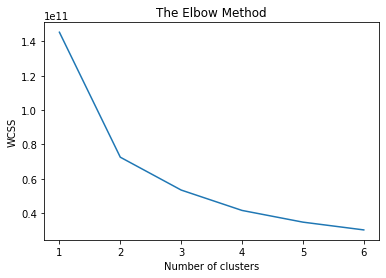

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 85)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Applying KMeans algorithm to our dataset with optimal K=2

In [11]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 21)
y_kmeans = kmeans.fit_predict(dataset)

#### Simple pie chart dipicting different categories of customer

([<matplotlib.patches.Wedge at 0x1bbb24f49c8>,
 [Text(-0.3981808279150466, 1.0254033490684962, 'Cat-1'),
  Text(0.3981808279150462, -1.0254033490684964, 'Cat-2')],
 [Text(-0.21718954249911632, 0.5593109176737251, '61.790001%'),
  Text(0.21718954249911612, -0.5593109176737252, '38.209999%')])

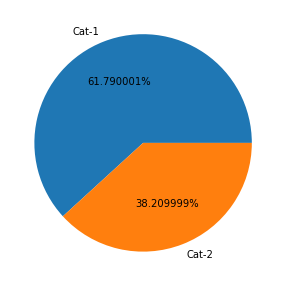

In [16]:
cat = ['Cat-1','Cat-2']
cat1=y_kmeans.count(0)
cat2=y_kmeans.count(1)

plt.figure(figsize=(5,5))
values=[cat1,cat2]
plt.pie(values,labels=cat,autopct="%1f%%")

## New Clustering algo(updating soon)